## Importing modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

## Load data

In [2]:
data = load_iris()

X = data["data"]
y = data["target"]

labels = data["target_names"]
y_labels = [labels[i] for i in y]

features = data["feature_names"]

n_clusters = len(labels)
n_features = len(features)

## Data visualization

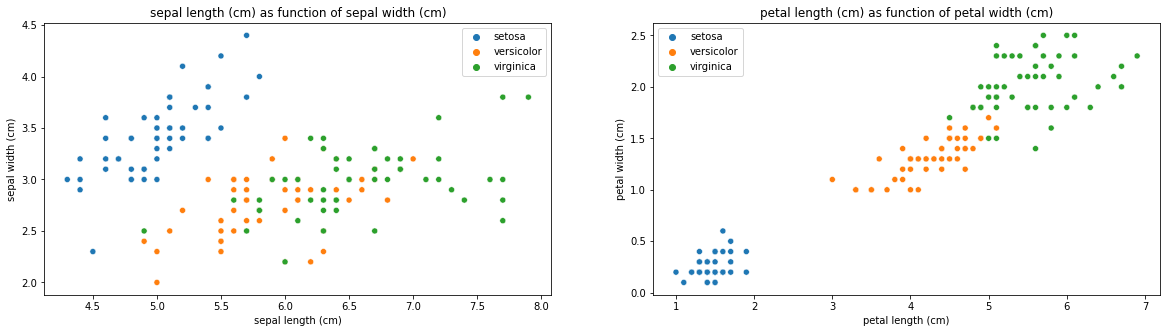

In [3]:
plt.figure(figsize=(20,5))

n_plot=1
for i in range(0, len(features), 2):
    plt.subplot(1, 2, n_plot)
    sbn.scatterplot(x=X[:,i], y=X[:,i+1], hue=y_labels)
    plt.xlabel(features[i])
    plt.ylabel(features[i+1])
    plt.title(f"{features[i]} as function of {features[i+1]}")
    n_plot += 1

plt.show()

## Calculation of all clusters

In [4]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [9]:
N = 100
all_kmeans = []
all_cluster = []
n_iter = []

for _ in range(N):
    #Creation of the random centroids
    centroid_mat = np.zeros((n_clusters, n_features))
    for j in range(n_features):
        for i in range(n_clusters):
            centroid_mat[i,j] = np.random.rand() * np.max(X)

    #Kmeans
    kmeans = KMeans(n_clusters=n_clusters, init=centroid_mat, n_init=1, max_iter=5)
    kmeans.fit(X)
    predictions = kmeans.predict(X)

    #Detect all the clusters
    cluster_pos = []
    for i in range(n_clusters):
        pos = np.where(predictions == i)[0].tolist()
        cluster_pos.append(pos)

    #Check if the actual cluster is a new one
    k = len(all_kmeans)
    for j in range(k):
        inter = intersection(cluster_pos, all_cluster[j][0])
        if (inter == cluster_pos) or (inter == all_cluster[j][0]):
            same = True
            break

    n_iter.append(kmeans.n_iter_)
    #If it's a new one, we add it, else we increase by one
    if (k==0) or (not same):
        all_cluster.append([cluster_pos, 1])
        all_kmeans.append(kmeans)
        same = False
    else:
        all_cluster[j][1] += 1

## Statistics

I noticed that most KMeans converge in less than 10 iterations. This has the effect of giving me often the same clusters. So I had to put a low number of iterations to have different clusters. And even like that, I don't have many different clusters. I think the Iris data is too easy for KMeans which prevents to get many different results.

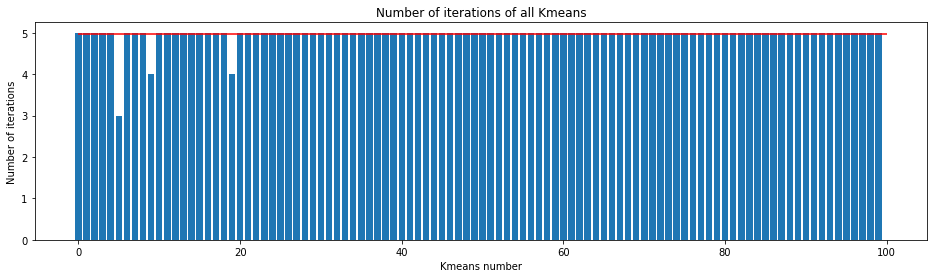

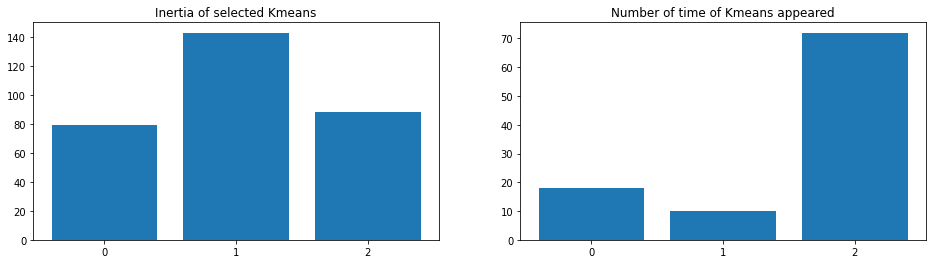

In [6]:
plt.figure(figsize=(16,4))

plt.bar(x=range(N), height=n_iter)
plt.hlines(np.mean(n_iter), xmin=0, xmax=N, color='r', linestyles="solid", )
plt.xlabel("Kmeans number")
plt.ylabel("Number of iterations")
plt.title("Number of iterations of all Kmeans")

inertia = [km.inertia_ for km in all_kmeans]
n_appear = [c[1] for c in all_cluster]

plots = [inertia, n_appear]
titles = ["Inertia of selected Kmeans", "Number of time of Kmeans appeared"]

plt.figure(figsize=(16,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.bar(x=range(len(all_kmeans)), height=plots[i])
    plt.xticks(range(len(all_kmeans)))
    plt.title(titles[i])

With 100 max iteration, i have only one or two different clusters.

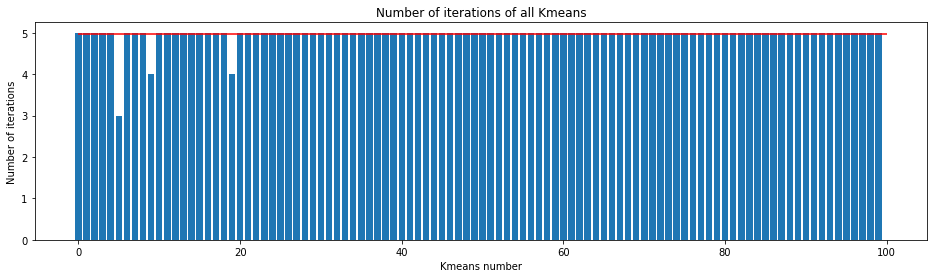

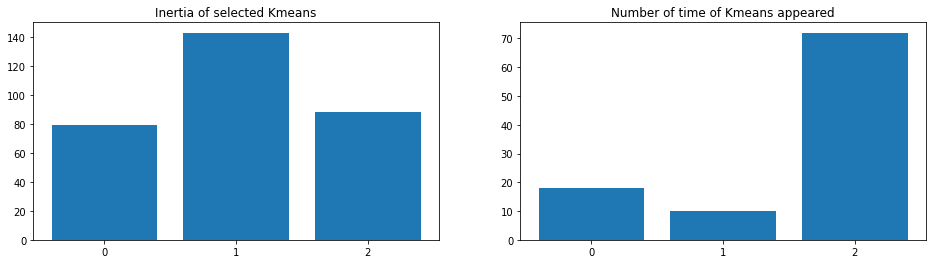

In [7]:
plt.figure(figsize=(16,4))

plt.bar(x=range(N), height=n_iter)
plt.hlines(np.mean(n_iter), xmin=0, xmax=N, color='r', linestyles="solid", )
plt.xlabel("Kmeans number")
plt.ylabel("Number of iterations")
plt.title("Number of iterations of all Kmeans")

inertia = [km.inertia_ for km in all_kmeans]
n_appear = [c[1] for c in all_cluster]

plots = [inertia, n_appear]
titles = ["Inertia of selected Kmeans", "Number of time of Kmeans appeared"]

plt.figure(figsize=(16,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.bar(x=range(len(all_kmeans)), height=plots[i])
    plt.xticks(range(len(all_kmeans)))
    plt.title(titles[i])

With 5 max iteration, i have 7 differents clusters.

## Clusters visualization

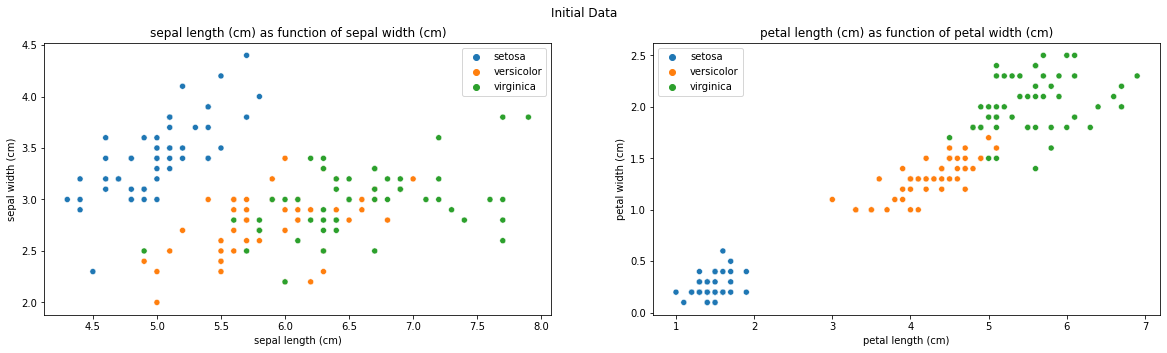

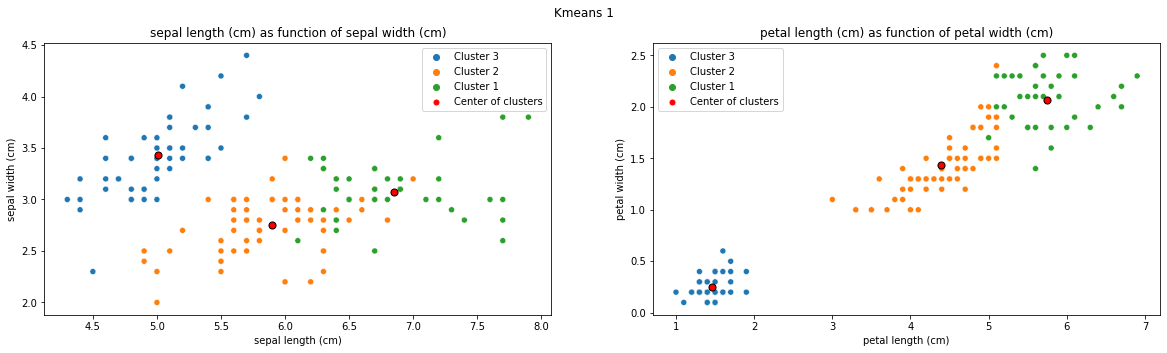

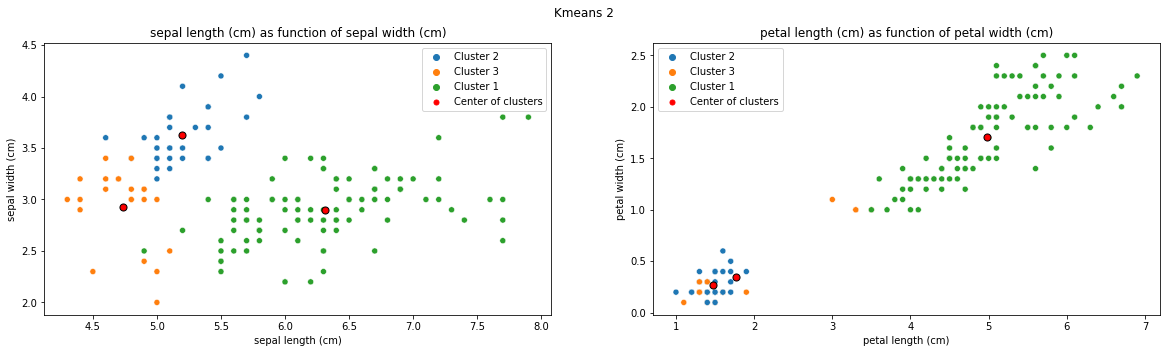

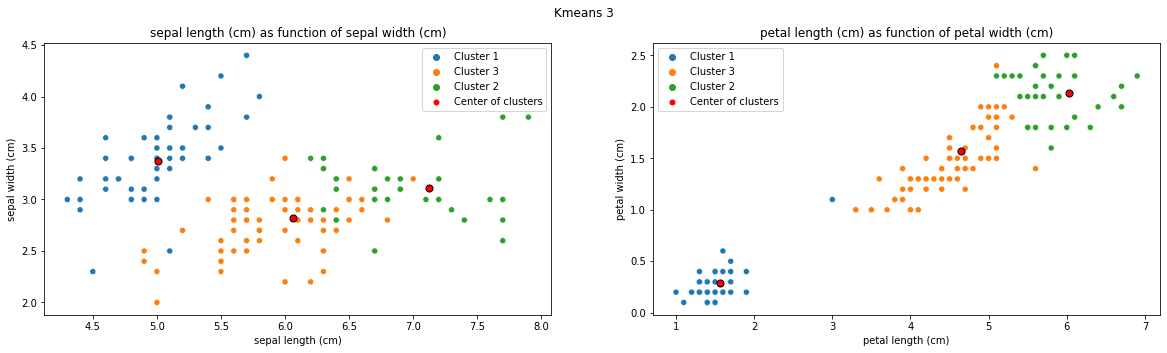

In [8]:
clusters = [f"Cluster {i+1}" for i in range(n_clusters)]

fig = plt.figure(figsize=(20,5))

j=1
for i in range(0, len(features), 2):
    plt.subplot(1, 2, j)
    sbn.scatterplot(x=X[:,i], y=X[:,i+1], hue=y_labels)
    plt.xlabel(features[i])
    plt.ylabel(features[i+1])
    plt.title(f"{features[i]} as function of {features[i+1]}")
    fig.suptitle("Initial Data")
    j += 1

plt.show()

k = 1
for km in all_kmeans:
    fig = plt.figure(figsize=(20,5))
    predictions_labels = [clusters[i] for i in km.predict(X)]

    j = 1
    for i in range(0, len(features), 2):
        plt.subplot(1, 2, j)
        sbn.scatterplot(x=X[:,i], y=X[:,i+1], hue=predictions_labels)
        plt.scatter(x=km.cluster_centers_[:,i],y=km.cluster_centers_[:,i+1], c = "black", s=50)
        plt.scatter(x=km.cluster_centers_[:,i],y=km.cluster_centers_[:,i+1], label="Center of clusters", c = "red", s=25)
        plt.legend()
        plt.xlabel(features[i])
        plt.ylabel(features[i+1])
        plt.title(f"{features[i]} as function of {features[i+1]}")
        fig.suptitle(f"Kmeans {k}")
        j += 1

    k += 1

plt.show()